In [1]:
import polars as pl
import matplotlib.pyplot as plt

df = pl.read_parquet("../0 - Data/type_checked_transactions.pq")

In [3]:
# Display basic info and statistics
df.describe()

statistic,User,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,Datetime,Is Fraud
str,str,str,f64,f64,f64,f64,str,str,str,str,str,f64,str,str,f64,str,str,f64,str,f64,f64,f64,f64,str,f64,f64,str,f64,f64,f64,f64,str,str,str,str,str,f64,f64,f64,str,f64,f64,f64,f64,str,f64
"""count""","""13412376""","""13412376""",1.3412376e7,1.3412376e7,1.3412376e7,1.3412376e7,"""13412376""","""13412376""","""13412376""","""13412376""","""13412376""",1.3412376e7,"""13412376""","""13412376""",1.3412376e7,"""13412376""","""13412376""",1.3412376e7,"""13412376""",1.3412376e7,1.3412376e7,1.3412376e7,1.3412376e7,"""13412376""",1.3412376e7,1.3412376e7,"""13412376""",1.3412376e7,1.3412376e7,1.3412376e7,1.3412376e7,"""13412376""","""13412376""","""13412376""","""13412376""","""13412376""",1.3412376e7,1.3412376e7,1.3412376e7,"""13412376""",1.3412376e7,1.3412376e7,1.3412376e7,1.3412376e7,"""13412376""",1.3412376e7
"""null_count""","""0""","""0""",0.0,0.0,0.0,0.0,"""0""","""0""","""0""","""0""","""0""",0.0,"""0""","""0""",0.0,"""0""","""0""",0.0,"""0""",0.0,0.0,0.0,0.0,"""0""",0.0,0.0,"""0""",0.0,0.0,0.0,0.0,"""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,"""0""",0.0,0.0,0.0,0.0,"""0""",0.0
"""mean""",null,null,2018.62601,6.105401,15.68379,42.325018,null,null,null,null,null,5566.651178,null,null,1.642844,null,null,4.8116e15,null,501.849758,0.897934,1.501158,15117.731069,null,2012.515183,0.0,null,54.689428,66.635556,1964.494094,6.539578,null,null,null,null,null,51102.928514,37.376546,-91.888987,null,46280.604919,54871.721376,719.693857,4.285687,"""2019-02-03 06:56:47.429256""",0.001379
"""std""",null,null,0.633889,3.586253,8.780264,79.643736,null,null,null,null,null,885.569016,null,null,1.512109,null,null,1.3390e15,null,289.189166,0.302735,0.517767,12430.036744,null,3.713661,0.0,null,17.219758,3.424748,17.201001,3.567259,null,null,null,null,null,29592.620728,5.111493,16.549955,null,23978.209502,51931.712548,62.717442,1.586708,null,0.037113
"""min""","""0""","""0""",2018.0,1.0,1.0,-500.0,"""Chip Transaction""","""-1000080909058489971""","""Abbeville""","""AA""","""10001.0""",1711.0,"""0""","""No""",0.0,"""Amex""","""Credit""",3.0011e14,"""01/2002""",0.0,0.0,1.0,0.0,"""01/1991""",2002.0,0.0,"""Aaden Campbell""",18.0,50.0,1918.0,1.0,"""Female""","""0 Elm Street""","""1""","""Abbeville""","""AK""",1060.0,20.88,-159.41,"""$0""",1.0,0.0,480.0,1.0,"""2018-01-01 00:03:00""",0.0
"""25%""",null,null,2018.0,3.0,8.0,8.9,null,null,null,null,null,5300.0,null,null,0.0,null,null,4.4899e15,null,253.0,1.0,1.0,7564.0,null,2010.0,0.0,null,42.0,65.0,1953.0,3.0,null,null,null,null,null,28306.0,33.88,-97.64,null,32583.0,12545.0,688.0,3.0,"""2018-07-19 11:25:00""",0.0
"""50%""",null,null,2019.0,6.0,16.0,28.33,null,null,null,null,null,5499.0,null,null,1.0,null,null,5.1011e15,null,508.0,1.0,1.0,13200.0,null,2012.0,0.0,null,52.0,67.0,1967.0,7.0,null,null,null,null,null,47424.0,38.35,-86.86,null,40848.0,47179.0,720.0,4.0,"""2019-02-03 12:55:00""",0.0
"""75%""",null,null,2019.0,9.0,23.0,62.02,null,null,null,null,null,5813.0,null,null,3.0,null,null,5.5825e15,null,749.0,1.0,2.0,20311.0,null,2015.0,0.0,null,66.0,68.0,1977.0,10.0,null,null,null,null,null,77586.0,41.12,-80.13,null,53986.0,81825.0,761.0,5.0,"""2019-08-21 14:47:00""",0.0
"""max""","""999""","""8""",2020.0,12.0,31.0,6613.44,"""Swipe Transaction""","""999682974109284083""","""Zwolle""","""Zimbabwe""","""Unknown""",9402.0,"""Technical Glitch""","""Yes""",8.0,"""Visa""","""Debit (Prepaid)""",6.9972e15,"""12/2024""",999.0,1.0,3.0,151223.0,"""12/2019""",2020.0,0.0,"""Zyaire Morales""",101.0,79.0,2002.0,12.0,"""Male""","""9995 

### Fraud vs Non-Fraud Distribution

C:\Users\ssipikal\AppData\Local\Temp\ipykernel_37636\2463789655.py:2: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  counts = df.group_by("Is Fraud?").agg(pl.count())


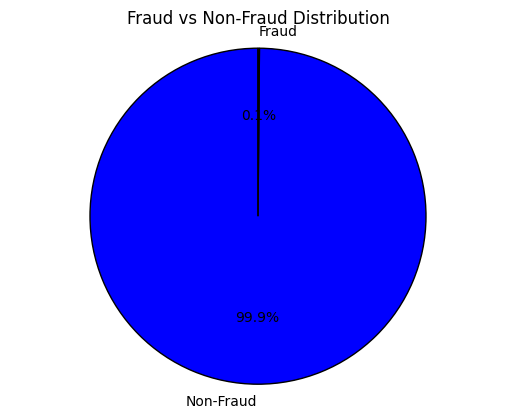

In [2]:
# Count frauds and non-frauds explicitly by grouping the "Is Fraud?" column
counts = df.group_by("Is Fraud?").agg(pl.count())

# Extract the counts for True (fraud) and False (non-fraud)
fraud_count = counts.filter(pl.col("Is Fraud?") == "Yes")['count'][0]  # True means Fraud
non_fraud_count = counts.filter(pl.col("Is Fraud?") == "No")['count'][0]  # False means Non-Fraud

# Data for the pie chart
labels = ["Non-Fraud", "Fraud"]
sizes = [non_fraud_count, fraud_count]
colors = ['blue', 'red']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Title
plt.title('Fraud vs Non-Fraud Distribution')

# Show plot
plt.show()

C:\Users\ssipikal\AppData\Local\Temp\ipykernel_37636\245787349.py:6: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  monthly_counts = df.group_by(["Year", "Month"]).agg(pl.count().alias("Transaction Count"))


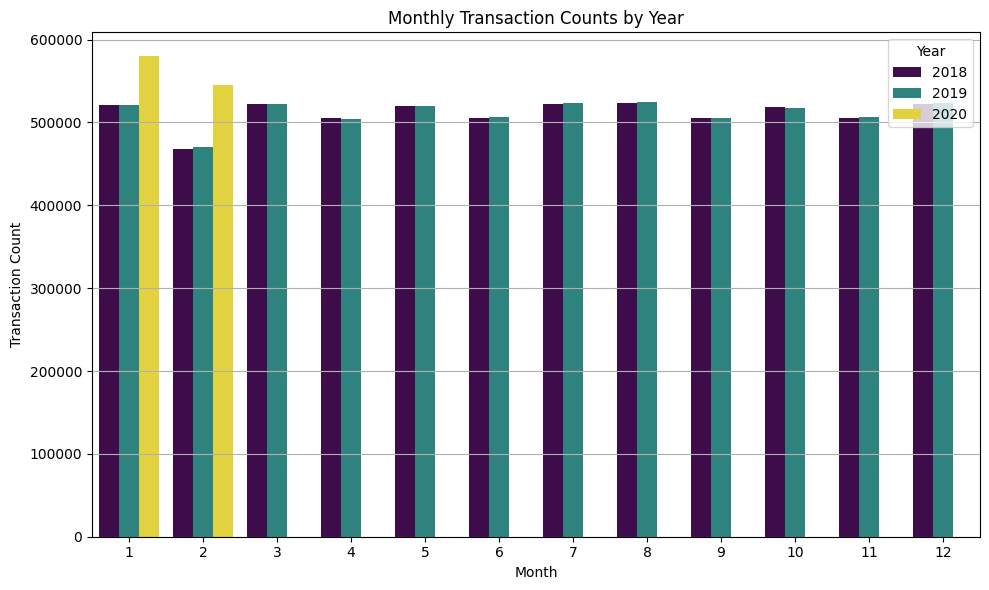

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count rows with the same Year and Month
monthly_counts = df.group_by(["Year", "Month"]).agg(pl.count().alias("Transaction Count"))

# Convert Polars DataFrame to Pandas DataFrame
monthly_counts_df = monthly_counts.to_pandas()

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_counts_df, x='Month', y='Transaction Count', hue='Year', palette='viridis')

# Customize the plot
plt.title('Monthly Transaction Counts by Year')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Count daily transactions
daily_counts = df.group_by(["Year", "Month", "Day"]).agg(pl.count().alias("Transaction Count"))

# Calculate the average daily transaction count for each Month and Year
avg_daily_counts = daily_counts.group_by(["Year", "Month"]).agg(pl.mean("Transaction Count").alias("Avg Daily Transaction Count"))

# Convert Polars DataFrame to Pandas DataFrame
avg_daily_counts_df = avg_daily_counts.to_pandas()

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_daily_counts_df, x='Month', y='Avg Daily Transaction Count', hue='Year', palette='viridis')

# Customize the plot
plt.title('Average Daily Transaction Counts by Month and Year')
plt.xlabel('Month')
plt.ylabel('Average Daily Transaction Count')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\ssipikal\AppData\Local\Temp\ipykernel_32696\1419173293.py:2: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  daily_counts = df.group_by(["Year", "Month", "Day"]).agg(pl.count().alias("Transaction Count"))


In [22]:
fraud_df = df.filter(pl.col("Is Fraud") == 1)

In [ ]:
fraud_df.describe()